<a href="https://colab.research.google.com/github/IkobiLynch/Capstone_Project/blob/main/ModelRetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds #imported to get the plant_village dataset
import matplotlib.pyplot as plt
import random

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split #split the data
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Path to dataset directory on local file system
dataset_directory = "C:/Users/Ikobi/Downloads/Plant_leaf_diseases_dataset_with_augmentation"

# C Method
# Loads the plant village dataset with the info for the dataset
#dataset_builder = tfds.builder("plant_village", data_dir=dataset_directory)
#dataset_builder.download_and_prepare()
#metadata = dataset_builder.info

# Load the training split from the downloaded dataset
#training_dataset = tfds.load("plant_village", split="train[:80%]", data_dir=dataset_directory, as_supervised=True)

#B method
# Create an instance of ImageDataGenerator to load and preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Load the training images and labels using flow_from_directory
train_generator = datagen.flow_from_directory(
    directory=dataset_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


#A Method
#Loads the plant village dataset with the info for the dataset.
#training_images, metadata = tfds.load("plant_village", split='train[:4%]', batch_size=-1, with_info=True, as_supervised=True)

#N.B training_images has the entire dataset. The image and the label
#metadat has information about the dataset


Found 55448 images belonging to 2 classes.


In [ ]:
print(metadata)

Stratified Sampling

In [ ]:
# Convert the training dataset to numpy arrays
#training_images_numpy = np.array([example[0] for example in tfds.as_numpy(training_dataset)])
#training_labels = np.array([example[1] for example in tfds.as_numpy(training_dataset)])
#training_images_numpy, training_labels = tfds.as_numpy(training_dataset) #Splits the data from the total dataset into (arrays of numeric images, and their labels)



# Rescaling the pixel values to a number between 0 and 1
#training_images_numpy = training_images_numpy / 255.0

# Splits the data into a training set and a testing set using stratified sampling
#train_images, test_images, train_labels, test_labels = train_test_split(
#    training_images_numpy, training_labels, test_size=0.2, random_state=1, stratify=training_labels
#)

# B Method
# Initialize empty lists to store the loaded data
training_images = []
training_labels = []

# Iterate over the batches and append the data to the lists
for images, labels in train_generator:
    training_images.append(images)
    training_labels.append(labels)

    # Break the loop if you have loaded enough data
    if len(training_images) * train_generator.batch_size >= 10000:
        break

# Concatenate the batches into numpy arrays
training_images_numpy = np.concatenate(training_images)
training_labels = np.concatenate(training_labels)

# Print the shape of the loaded data
print("Training Images Shape:", training_images_numpy.shape)
print("Training Labels Shape:", training_labels.shape)





#training_images_numpy, training_labels = tfds.as_numpy(training_images) #Splits the data from the total dataset into (arrays of numeric images, and their labels)

#Rescaling the pixel values to a number between 0 and 1.
#training_images_numpy = training_images_numpy/255


#Splits the data into a training set and a testing set using stratified sampling.
train_images, test_images, train_labels, test_labels = train_test_split(training_images_numpy, training_labels, test_size=0.2, random_state=1, stratify=training_labels)


Preprocessing

In [ ]:
#Creates function that will be used to change the predicted int label to the string label
get_label_name = metadata.features['label'].int2str


#image, label = next(iter(training_images[0])), next(iter(training_labels))
#print(label)

#_ = plt.imshow(train_images[1])
#_ = plt.title(get_label_name(label))

In [ ]:
print(get_label_name)

<class 'method'>


Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)

])


Create Model

In [ ]:
conv_model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(38, activation=None),
    layers.Activation('softmax')
])

In [ ]:
conv_model.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
history = conv_model.fit(train_images, train_labels, epochs=28, batch_size=33)

In [ ]:
tf.keras.models.save_model(conv_model, "new_model.hdf5")

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

Evaluating the model.

In [ ]:
out = test_loss, test_acc = conv_model.evaluate(test_images, test_labels, verbose=2)
print('Accuracy {:.2f}%'.format(out[1]*100))

In [ ]:
#image, label = next(iter(training_images[0])), next(iter(training_labels))
#_ = plt.imshow(image)
#_ = plt.title(get_label_name(label))

picked_idx = random.randint(0, test_images.shape[0]-1)

img_picked = test_images[picked_idx]



label = test_labels[picked_idx]

predicted_idx = conv_model.predict(img_picked.reshape(1, 256, 256, 3))
pred_label = np.argmax(predicted_idx)

plt.imshow(img_picked.reshape(256, 256, 3))
plt.title(get_label_name(pred_label))
print('Label: ', label)
print("Predicted Label: ", pred_label)




Text(0.5, 1.0, 'Squash___Powdery_mildew')

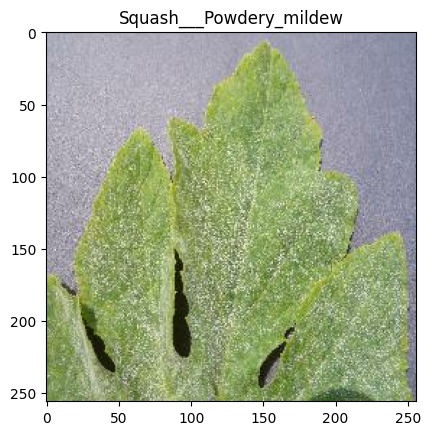

In [ ]:
plt.imshow(img_picked.reshape(256, 256, 3))
plt.title(get_label_name(label))

**Streamlit Web App**

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=3981fec543894bd3c50795b92e13102f62db369a966f59e62d5bf5ae32becf89
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import tensorflow_datasets as tfds

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation= True)
def load_model():
  model= tf.keras.models.load_model('/content/my_model3.hdf5')
  return model


def download_dataset_metadata():
    dataset_builder = tfds.builder('plant_village')
    dataset_builder.download_and_prepare()
    metadata = dataset_builder.info
    return metadata

metadata = download_dataset_metadata()
#training_images, metadata = tfds.load("plant_village", split='train[:4%]', batch_size=-1, with_info=True, as_supervised=True)
get_label_name = metadata.features['label'].int2str



model = tf.keras.models.load_model('/content/my_model3.hdf5')
st.write("""
            Plant Classification""")

file = st.file_uploader("Please Upload Image", type=["jpg","png"])
import cv2
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data,model):
  image_data = np.array(image_data)  # Convert image_data to numpy array
  st.write(image_data)
  image_data = image_data / 255.0    # Normalize image_data
  st.write(image_data)

  size= (256,256)
  img = Image.fromarray((image_data * 255).astype(np.uint8))
  st.write(img)
  image= ImageOps.fit(img, size, Image.ANTIALIAS)

  img= np.asarray(image)
  img_reshape=img[np.newaxis,...]
  prediction = model.predict(img_reshape)

  return prediction

if file is None:
  st.text("Upload Image")
else:

  #get_label_name = metadata.features['label'].int2str


  image= Image.open(file)
  st.image(image, use_column_width=True)
  predictions = import_and_predict(image,model)

  st.write(predictions)
  st.success(get_label_name(np.argmax(predictions)))


Overwriting app.py


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok config add-authtoken 2PQp9E7e3d5iGKOVDIM4mmE2pxG_3s8nrB2v5qChu8DpqR1rR

/bin/bash: ngrok: command not found


In [ ]:
#from pyngrok import ngrok

In [ ]:
#ngrok.set_auth_token("2PNbcmBdA7M8yeDtm0ihhrm0H39_4D87GixQmCYPnYwA2qKA3")

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.135.238:8501

  Stopping...
^C
